In [31]:
from math import ceil, log10
from random import seed, randint
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from numpy import argmax
from matplotlib import pyplot

In [2]:
#generate lists of random integers and their sum
def random_sum_pairs(n_examples, n_numbers, largest):
    X, y = list(), list()
    for i in range(n_examples):
        in_pattern = [randint(1,largest) for _ in range(n_numbers)]
        out_pattern = sum(in_pattern)
        X.append(in_pattern)
        y.append(out_pattern)
    return X, y

In [3]:
seed(1)
n_samples = 1
n_numbers = 3
largest = 10
#generate pairs
X, y = random_sum_pairs(n_samples, n_numbers, largest)
print(X, y)

([[2, 9, 8]], [19])


In [4]:
#max length of input sequence
max_length_i = n_numbers*ceil(log10(largest+1)) + n_numbers - 1
print(max_length_i)

8.0


In [5]:
#max length of output sequence
max_length_o = ceil(log10(n_numbers*(largest+1)))
print(max_length_o)

2.0


In [6]:
#convert data to strings
def to_string(X, y, n_numbers, largest):
    max_length = int(n_numbers*ceil(log10(largest+1)) + n_numbers - 1)
    Xstr = list()
    for pattern in X:
        strp = '+'.join([str(n) for n in pattern])
        strp = ''.join([' ' for _ in range(max_length-len(strp))])  + strp
        Xstr.append(strp)
    max_length = int(ceil(log10(n_numbers*(largest+1))))
    ystr = list()
    for pattern in y:
        strp = str(pattern)
        strp = ''.join([' ' for _ in range(max_length-len(strp))]) + strp
        ystr.append(strp)
    return Xstr, ystr

In [7]:
seed(1)
n_samples = 1
n_numbers = 2
largest = 10

In [8]:
#generate pairs
X, y = random_sum_pairs(n_samples, n_numbers, largest)
print(X, y)

([[2, 9]], [11])


In [9]:
X, y = to_string(X, y, n_numbers, largest)
print(X, y)

(['  2+9'], ['11'])


In [10]:
alphabet = [str(i) for i in range(0, 10)]
alphabet.append('+')
alphabet.append(' ')
print(alphabet)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', ' ']


In [11]:
#integer encode strings
def integer_encode(X, y, alphabet):
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    Xenc = list()
    for pattern in X:
        integer_encoded = [char_to_int[char] for char in pattern]
        Xenc.append(integer_encoded)
    yenc = list()
    for pattern in y:
        integer_encoded = [char_to_int[char] for char in pattern]
        yenc.append(integer_encoded)
    return Xenc, yenc

In [12]:
seed(1)
n_samples = 1
n_numbers = 2
largest = 10

In [13]:
#generate pairs
X, y = random_sum_pairs(n_samples, n_numbers, largest)
print(X, y)

([[2, 9]], [11])


In [14]:
#convert to strings
X, y = to_string(X, y, n_numbers, largest)
print(X, y)

(['  2+9'], ['11'])


In [15]:
#creating alphabet list
alphabet = [str(i) for i in range(0, 10)]
alphabet.append('+')
alphabet.append(' ')
print(alphabet)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', ' ']


In [16]:
#integer encode
X, y = integer_encode(X, y, alphabet)
print(X, y)

([[11, 11, 2, 10, 9]], [[1, 1]])


In [17]:
# one hot encode
def one_hot_encode(X, y, max_int):
    Xenc = list()
    for seq in X:
        pattern = list()
        for index in seq:
            vector = [0 for _ in range(max_int)]
            vector[index] = 1
            pattern.append(vector)
        Xenc.append(pattern)
    yenc = list()
    for seq in y:
        pattern = list()
        for index in seq:
            vector = [0 for _ in range(max_int)]
            vector[index] = 1
            pattern.append(vector)
        yenc.append(pattern)
    return Xenc, yenc

In [18]:
#one hot encode
X, y = one_hot_encode(X, y, len(alphabet))
print(X, y)
X = array(X)
y = array(y)
print(X.shape, y.shape)

([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]], [[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])
((1, 5, 12), (1, 2, 12))


In [19]:
# generate an encoded dataset
def generate_data(n_samples, n_numbers, largest, alphabet):
    # generate pairs
    X, y = random_sum_pairs(n_samples, n_numbers, largest)
    # convert to strings
    X, y = to_string(X, y, n_numbers, largest)
    # integer encode
    X, y = integer_encode(X, y, alphabet)
    # one hot encode
    X, y = one_hot_encode(X, y, len(alphabet))
    # return as numpy arrays
    X, y = array(X), array(y)
    return X, y

In [20]:
#invert encoding
def invert(seq, alphabet):
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
    strings = list()
    for pattern in seq:
        string = int_to_char[argmax(pattern)]
        strings.append(string)
    return ''.join(strings)

In [21]:
# number of math terms
n_terms = 3
# largest value for any single input digit
largest = 10
# scope of possible symbols for each input or output time step
alphabet = [str(x) for x in range(10)] + ['+', ' ']

In [22]:
# size of alphabet: (12 for 0-9, + and ' ')
n_chars = len(alphabet)
# length of encoded input sequence (8 for '10+10+10')
n_in_seq_length = int(n_terms * ceil(log10(largest+1)) + n_terms - 1)
# length of encoded output sequence (2 for '30')
n_out_seq_length = int(ceil(log10(n_terms * (largest+1))))

In [23]:
#define LSTM
model = Sequential()
model.add(LSTM(75, input_shape=(n_in_seq_length, n_chars)))
model.add(RepeatVector(n_out_seq_length))
model.add(LSTM(50, return_sequences=True))
model.add(TimeDistributed(Dense(n_chars, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                26400     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 2, 75)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 50)             25200     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 12)             612       
Total params: 52,212
Trainable params: 52,212
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
# fit LSTM
X, y = generate_data(10000, n_terms, largest, alphabet)

In [41]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.33)

Train on 6699 samples, validate on 3301 samples
Epoch 1/20
6699/6699 [==============================] - 3s 387us/step - loss: 0.0181 - acc: 0.9984 - val_loss: 0.0196 - val_acc: 0.9964
Epoch 2/20
6699/6699 [==============================] - 3s 377us/step - loss: 0.0159 - acc: 0.9981 - val_loss: 0.0169 - val_acc: 0.9964
Epoch 3/20
6699/6699 [==============================] - 3s 378us/step - loss: 0.0138 - acc: 0.9982 - val_loss: 0.0164 - val_acc: 0.9964
Epoch 4/20
6699/6699 [==============================] - 3s 400us/step - loss: 0.3859 - acc: 0.8844 - val_loss: 0.0324 - val_acc: 0.9933
Epoch 5/20
6699/6699 [==============================] - 3s 401us/step - loss: 0.0248 - acc: 0.9969 - val_loss: 0.0231 - val_acc: 0.9964
Epoch 6/20
6699/6699 [==============================] - 3s 435us/step - loss: 0.0181 - acc: 0.9977 - val_loss: 0.0182 - val_acc: 0.9964
Epoch 7/20
6699/6699 [==============================] - 3s 435us/step - loss: 0.0152 - acc: 0.9981 - val_loss: 0.0156 - val_acc: 0.9985


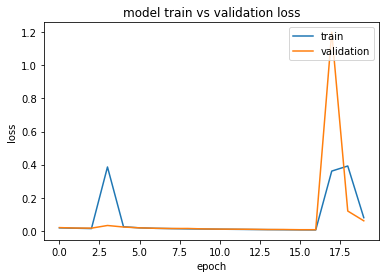

In [42]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [43]:
# evaluate LSTM
X, y = generate_data(100, n_terms, largest, alphabet)
loss, acc = model.evaluate(X, y, verbose=0)
print('Loss: %f, Accuracy: %f' %(loss, acc*100))

Loss: 0.051107, Accuracy: 99.500000


In [44]:
# predict
for _ in range(10):
    # generate an input-output pair
    X, y = generate_data(1, n_terms, largest, alphabet)
    #make prediction
    yhat = model.predict(X, verbose=0)
    #decode input, expected and predicted
    in_seq = invert(X[0], alphabet)
    out_seq = invert(y[0], alphabet)
    predicted = invert(yhat[0], alphabet)
    print('%s = %s (expected %s)' %(in_seq, predicted, out_seq))

   4+1+4 =  9 (expected  9)
   5+8+5 = 18 (expected 18)
  10+6+2 = 18 (expected 18)
 10+10+8 = 28 (expected 28)
  10+1+5 = 16 (expected 16)
   4+5+5 = 14 (expected 14)
   4+5+9 = 18 (expected 18)
  2+10+9 = 21 (expected 21)
  9+10+7 = 26 (expected 26)
   1+4+6 = 11 (expected 11)
